1500 1534


Text(0.5, 1.0, 'gaussian r=1 + 3x3 laplacian usm')

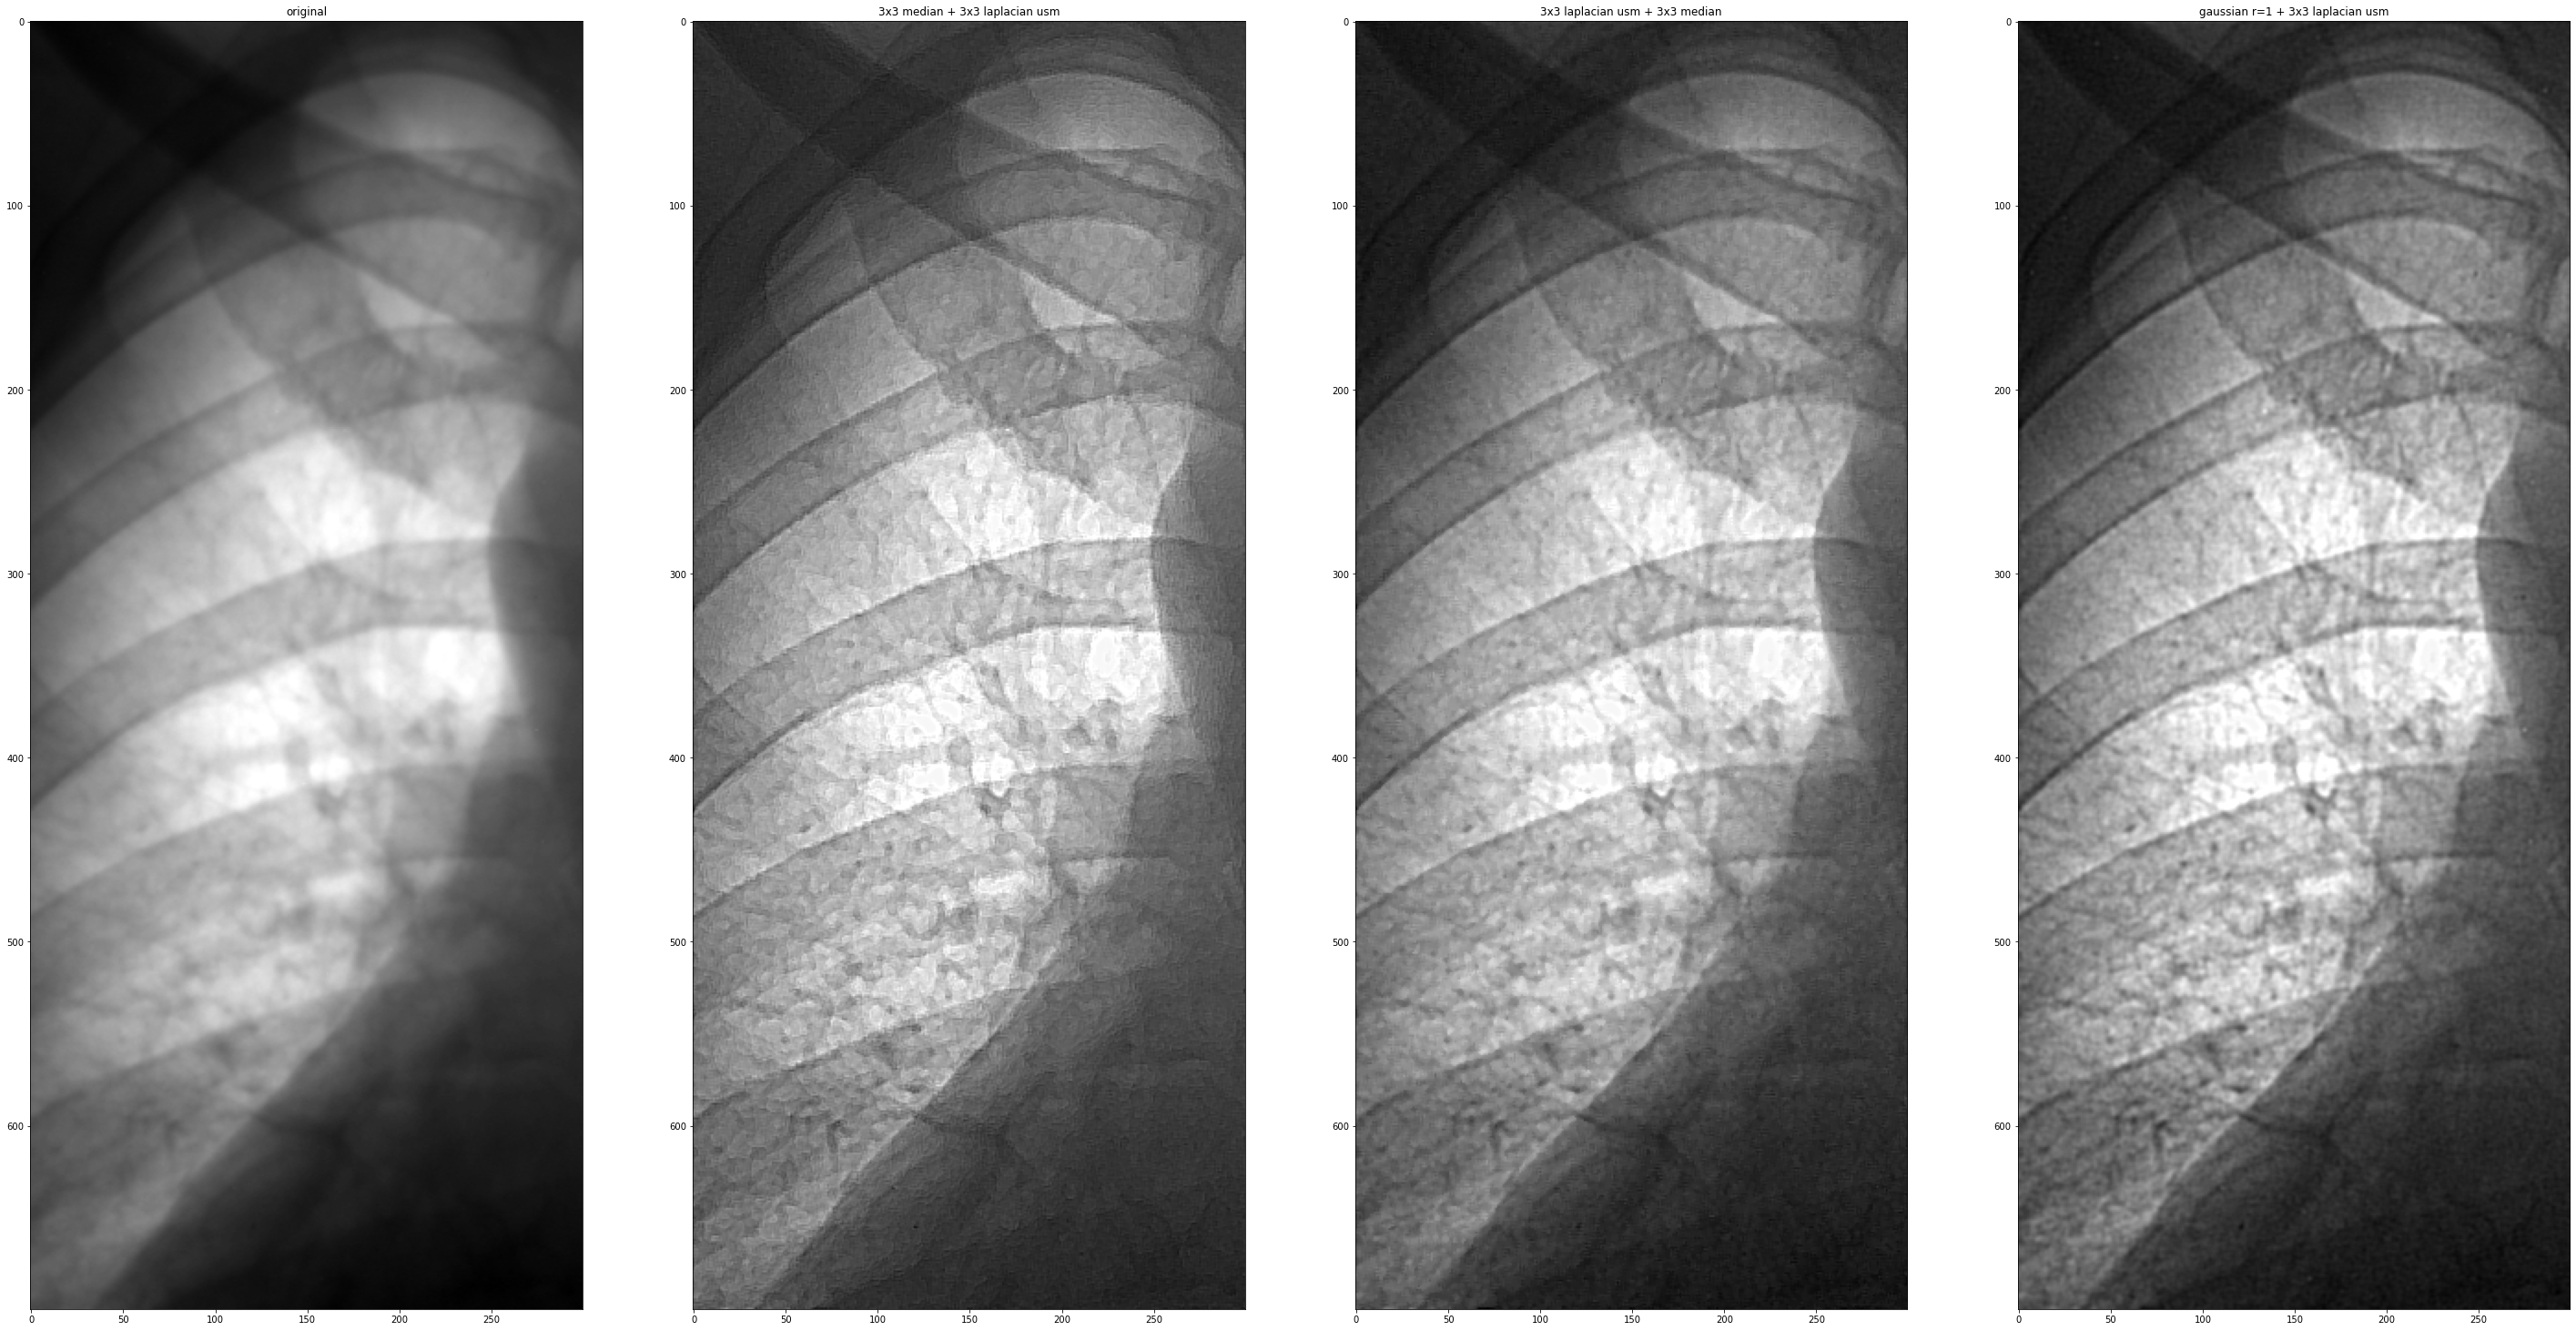

In [36]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import struct


def raw_imread(filename):
    fp = open(filename, 'rb')
    w, = struct.unpack("<i", fp.read(4))
    h, = struct.unpack("<i", fp.read(4))
    print(w, h)
    a = [[struct.unpack("<H", fp.read(2))[0]
          for i in range(w)] for i in range(h)]
    return a


img = raw_imread("lung.raw")
img = np.array(img, dtype='uint16')
img = img[200:900, 400:700]


def f(sigma):
    g1 = cv2.getGaussianKernel(19, sigma)
    g = g1 * g1.T
    dst = cv2.filter2D(img, -1, g)
    a = dst
    return a


# img_b = f(0.1)
img_b = cv2.medianBlur(img, 3)
img_o = cv2.Laplacian(img_b, cv2.CV_32F, ksize=3)
img_l = img_b + (-2) * img_o

img_u = cv2.Laplacian(img, cv2.CV_32F, ksize=3)
img_v = img + (-2) * img_u
img_w = cv2.medianBlur(img_v, 3)

img_i = f(1)
img_j = cv2.Laplacian(img_i, cv2.CV_32F, ksize=3)
img_k = img_i + (-3) * img_j

plt.figure(figsize=(50, 50))
plt.subplot(141)
plt.imshow(img.clip(0, 4200), cmap='gray')
plt.title('original')
plt.subplot(142)
plt.imshow(img_l.clip(0, 4200), cmap='gray')
plt.title('3x3 median + 3x3 laplacian usm')
plt.subplot(143)
plt.imshow(img_w.clip(0, 4200), cmap='gray')
plt.title('3x3 laplacian usm + 3x3 median')
plt.subplot(144)
plt.imshow(img_k.clip(0, 4200), cmap='gray')
plt.title('gaussian r=1 + 3x3 laplacian usm')